In [32]:
# Assignment 1 - Data Exploration: StreamFlow

In [33]:
# Load the toolboxes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load the data file
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [35]:
# Approach 1: Analyze the subscription time of churn users
# Step A: calculate the surbcription time of churn users

# Convert columns to datetime format
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'], errors='coerce')
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'], errors='coerce')

# Exclude rows where 'Date_of_Churn' is null
filtered_df = df.dropna(subset=['Date_of_Churn'])

# Calculate the difference in days
filtered_df['subscription days'] = (filtered_df['Date_of_Churn'] - filtered_df['Subscription_Start_Date']).dt.days

# Select the relevant column
result_df = filtered_df[['subscription days']]

# Display the result
result_df


C:\Users\NeilXu\AppData\Local\Temp\ipykernel_16108\509528465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['subscription days'] = (filtered_df['Date_of_Churn'] - filtered_df['Subscription_Start_Date']).dt.days


,subscription days
12,52
13,133
14,270
16,233
29,282
...,...
983,236
991,36
992,271
995,139


C:\Users\NeilXu\AppData\Local\Temp\ipykernel_16108\3116605747.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['category'] = result_df['subscription days'].apply(categorize_diff)


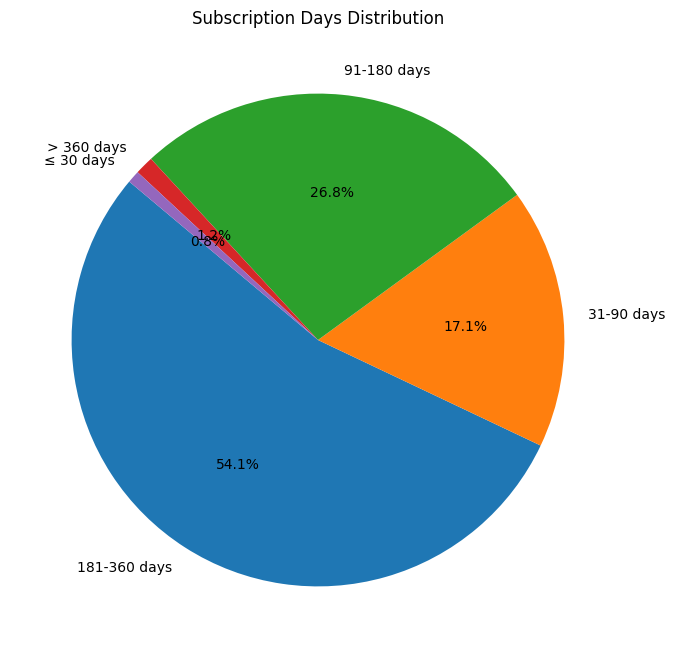

In [55]:
# Approach 1: Analyze the subscription time of churn users
# Step B: categorize the differences of days and analyze
# Define the categories
def categorize_diff(days):
    if days <= 30:
        return '≤ 30 days'
    elif days <= 90:
        return '31-90 days'
    elif days <= 180:
        return '91-180 days'
    elif days <= 360:
        return '181-360 days'
    else:
        return '> 360 days'

# Apply the categorization
result_df['category'] = result_df['subscription days'].apply(categorize_diff)

# Count occurrences
category_counts = result_df['category'].value_counts().sort_index()

# Calculate percentages
category_percentages = (category_counts / category_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Days Distribution')
plt.show()


In [56]:
# Approach 1: Conclusion: subscribers usually do not change there plans in first 30 days or after 1 year of their subscriptions, while growing number of changes are made in "30-60 days", "60-180 days" and "180-360 days" perspectively. Therefore, more promotions, offers and customer services might be neccessary in 30 - 360 days after subscribers paid.

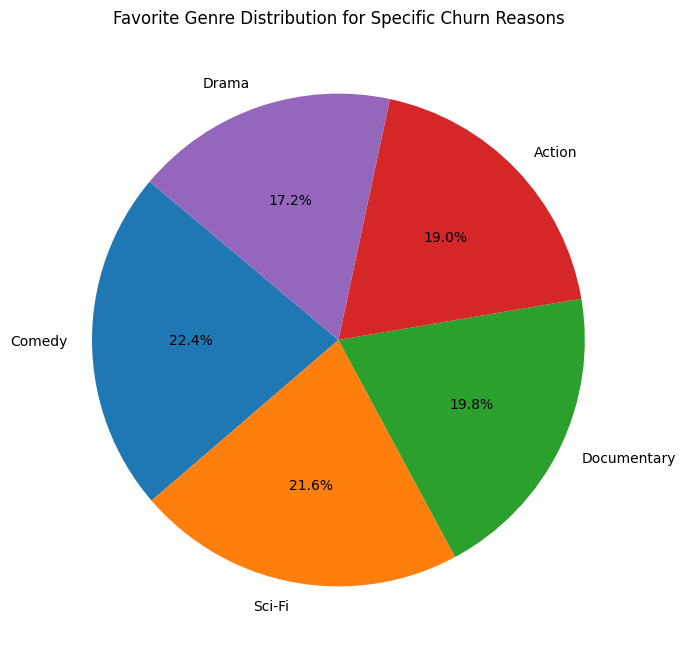

In [57]:
# Approach 2: Analyze the 'Reason for Churn', match with 'Favorite_Genre', see which genre of contents the company should improve on

# Filter the data to include only the specified reasons for churn
filtered2_df = df[df['Reason_for_Churn'].isin(['Found better service', 'Dissatisfied with content'])]

# Count occurrences of each genre
genre_counts = filtered2_df['Favorite_Genre'].value_counts()

# Calculate percentages
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_percentages, labels=genre_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Favorite Genre Distribution for Specific Churn Reasons')
plt.show()

In [58]:
# Approach 2 Conclusion: among churned subscrbers who claimed "found a better service' or "dissatisfied with the content", no specific genre stands out.

                count       mean        std       min       25%        50%  \
Favorite_Genre                                                               
Action          205.0  19.804413  21.153638  0.136395  5.119525  13.753400   
Comedy          203.0  19.351084  17.847917  0.046522  5.828812  13.904596   
Documentary     188.0  18.926943  20.398316  0.041574  4.872628  11.757820   
Drama           212.0  18.472368  15.450220  0.148387  6.796899  14.496013   
Sci-Fi          192.0  18.797246  21.377247  0.054236  5.026336  11.945440   

                      75%         max  
Favorite_Genre                         
Action          26.511515  127.764432  
Comedy          27.737274   89.291623  
Documentary     27.792360  114.949551  
Drama           25.600226   82.617192  
Sci-Fi          23.294687  139.170408  


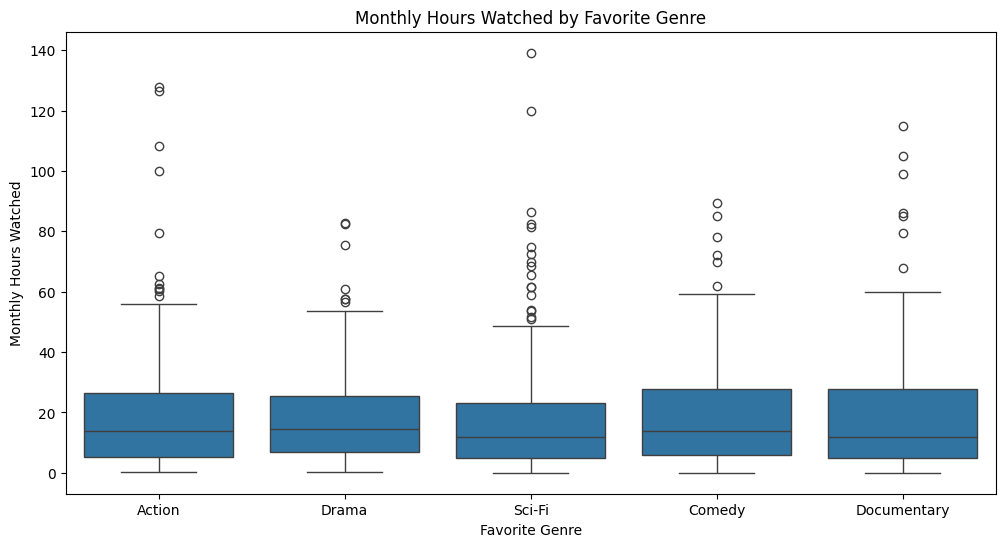

In [59]:
# Approach 3: Analyze the genre based on screen time the subscribers spent

# Describe the data for each genre
descriptions = df.groupby('Favorite_Genre')['Monthly_Hours_Watched'].describe()

# Display the descriptions
print(descriptions)

# Create box plots for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Monthly_Hours_Watched', data=df)
plt.title('Monthly Hours Watched by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Monthly Hours Watched')
plt.show()

In [60]:
# Approach 3 Conclusion: Average time subscribers spent on the contents for each genre, categorized by their favorite genre, show no major differences. However, we observe the std. dev. of “Action”, "Documentary" and "Sci-fi" fans are higher, with many outliers on the high end. Thus, the company could consider invest more on contents of these three genres to attract more loyal and die-heart fans of such genres.

                count       mean       std   min    25%    50%    75%    max
Favorite_Genre                                                              
Action          205.0  14.843659  3.390883  9.99  14.99  14.99  14.99  19.99
Comedy          203.0  14.817586  3.161468  9.99  14.99  14.99  14.99  19.99
Documentary     188.0  14.431489  3.364136  9.99   9.99  14.99  14.99  19.99
Drama           212.0  14.376792  3.523975  9.99   9.99  14.99  14.99  19.99
Sci-Fi          192.0  14.417083  3.571982  9.99   9.99  14.99  14.99  19.99


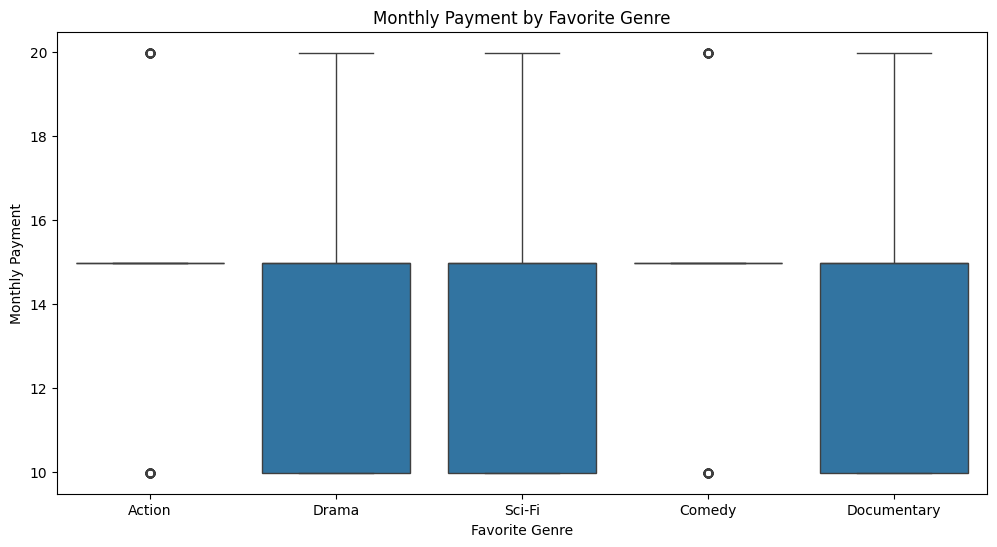

In [61]:
# Approach 4: Analyze the the money subscribers paid for each genre, base on the "Favorite_genre" column

# Describe the data for each genre
descriptions2 = df.groupby('Favorite_Genre')['Monthly_Payment'].describe()

# Display the descriptions
print(descriptions2)

# Create box plots for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Monthly_Payment', data=df)
plt.title('Monthly Payment by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Monthly Payment')
plt.show()

In [62]:
# Approach 4 Conclusion: mroe the 75% percent of users whose favorite genre are “Action” or "Comedy" are willing to pay for the Standard Plan while these percentages for other 3 genres are lower. This obeservation resonate partially with the conclusion of the last approach. Namely, investing more in contents of “Sci-fi” and "Documentery" could make users more willing to pay for a better plan. Also, the company could consider providing more promotions and discounts to "Drama", "Sci-Fi" and "Documentary" lovers.

                count       mean        std       min        25%        50%  \
Favorite_Genre                                                                
Action           15.0  33.257383  28.466438  0.356560  13.226458  25.148929   
Comedy           13.0  14.328316  11.538384  0.392793   5.776948  11.746358   
Documentary      16.0  13.906991   8.790030  0.191784   8.604617  14.523145   
Drama            13.0  11.565370  10.699475  0.212144   2.862274  12.142165   
Sci-Fi           11.0  13.841817  12.443673  1.146372   5.175955   6.216123   

                      75%         max  
Favorite_Genre                         
Action          44.342520  100.009333  
Comedy          16.887851   39.067711  
Documentary     18.707323   34.356577  
Drama           17.039662   35.366932  
Sci-Fi          22.626711   34.716627  


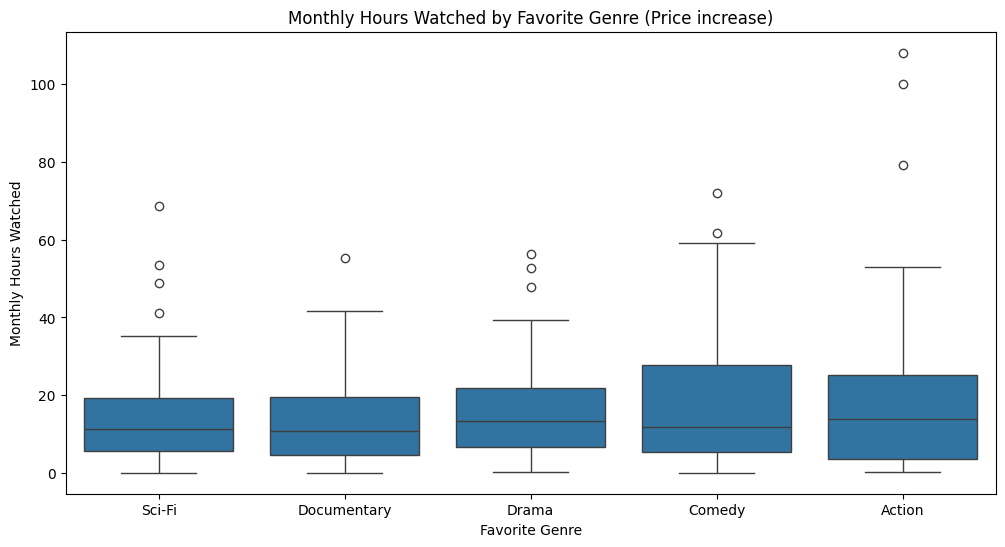

In [63]:
# Approach 5: Among churned users who indicate "Price increase", analyze their monthly hours watched, categorized by "Favorite_Genre"

# Filter the data to include only rows where the reason for churn is "Price increase"
filtered3_df = df[df['Reason_for_Churn'] == 'Price increase']

# Describe the data for each genre
descriptions3 = filtered3_df.groupby('Favorite_Genre')['Monthly_Hours_Watched'].describe()

# Display the descriptions
print(descriptions3)

# Create box plots for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Monthly_Hours_Watched', data=filtered_df)
plt.title('Monthly Hours Watched by Favorite Genre (Price increase)')
plt.xlabel('Favorite Genre')
plt.ylabel('Monthly Hours Watched')
plt.show()

In [64]:
# Approach 4 Conclusion: Among chuned users indicated "increased price", the "action" lovers have signicantly higher mean, median and outliers for "monthly hours watched". This means that they really like the contents and are willing to spend time on such contents but are very price-sensitive. In other words, price drove them away.